In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor, GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
gp_data = pd.read_csv('gp_data.csv')
gp_data.head()

,district,subcounty,parish,population,households,fem_hhs,long,lat,km2,area,...,T123_per_person,not_T123_per_person,geometry,centroid,coord_x,coord_y,coord_z,cluster,average pm2_5,category
0,MUKONO,GOMA DIVISION,NANTABULIRWA,22241,4993,24.1,32.700915,0.333435,36.709773,36.376969,...,0.57,0.50,"POLYGON((32.7267447270215 0.326316235088979, 3...",POINT(32.7009147194484 0.333434596471355),0.266405,0.906592,0.327290,13,33.419091,Moderate
1,KAMPALA,NAKAWA DIVISION,KIWATULE,16915,4497,32.2,32.626714,0.368906,2.907240,2.881629,...,0.24,0.19,"POLYGON((32.6233900600041 0.357431522624744, 3...",POINT(32.6267137789408 0.368905588996633),0.328582,0.872929,0.360595,5,62.826075,Unhealthy
2,KAMPALA,NAKAWA DIVISION,NTINDA,5257,1356,33.6,32.618145,0.346663,2.693763,2.670111,...,0.79,0.63,"POLYGON((32.6076705687482 0.352370728818616, 3...",POINT(32.6181453501911 0.346662584687354),0.338856,0.877348,0.339761,13,52.140047,Unhealthy for Sensitive Groups
3,KAMPALA,NAKAWA DIVISION,BUKOTO I,23045,6386,30.8,32.596444,0.352933,2.097909,2.079645,...,0.15,0.12,"POLYGON((32.606305670664 0.351686206757447, 32...",POINT(32.5964437591639 0.352933214544676),0.356997,0.867801,0.345652,7,61.987713,Unhealthy
4,KAMPALA,NAKAWA DIVISION,BUGOLOBI,5023,1279,23.6,32.622657,0.311176,3.912260,3.877850,...,0.61,0.41,"POLYGON((32.6366037654667 0.30743072901818, 32...",POINT(32.6226571504019 0.311175541587068),0.338976,0.889579,0.306178,13,44.273017,Unhealthy for Sensitive Groups


In [82]:
def run_gp_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
    kernel = 1.0 * RBF(1.0)
    gpc = GaussianProcessClassifier(kernel=kernel, random_state=0)
    gpc.fit(X_train, y_train)
    y_pred = gpc.predict(X_test)
    
    accuracy =  accuracy_score(y_test, y_pred)
    precision =  precision_score(y_test, y_pred, average=None)
    recall =  recall_score(y_test, y_pred, average=None)
    
    print ('Gaussian Process Model')
    print ('Accuracy: ', accuracy)
    print ('Precision: ', precision)
    print ('Recall: ', recall)
    

def run_logistic_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
    
    from sklearn.linear_model import LogisticRegression
    logreg = LogisticRegression(C=1e5)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    accuracy =  accuracy_score(y_test, y_pred)
    precision =  precision_score(y_test, y_pred, average=None)
    recall =  recall_score(y_test, y_pred, average=None)
    
    print ('Logistic Regression Model')
    print ('Accuracy: ', accuracy)
    print ('Precision: ', precision)
    print ('Recall: ', recall)

def run_rf_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
    
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(max_depth=2, random_state=0)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    accuracy =  accuracy_score(y_test, y_pred)
    precision =  precision_score(y_test, y_pred, average=None)
    recall =  recall_score(y_test, y_pred, average=None)
    
    print ('Random Forest Model')
    print ('Accuracy: ', accuracy)
    print ('Precision: ', precision)
    print ('Recall: ', recall)

In [83]:
total_data = gp_data[['light_par_tadooba_per_km', 'light_firewood_per_km', 'light_cow_dung_per_km', 'light_grass_per_km', 
          'cook_charc_per_km', 'cook_firewood_per_km', 'cook_dung_per_km', 'cook_grass_per_km', 'waste_burn_per_km',
          'kitch_outside_built_per_km', 'kitch_make_shift_per_km', 'kitch_open_space_per_km', 'pop_density', 
          'hhs_density', 'T123_per_sqkm', 'average pm2_5']]

##### Feature selection

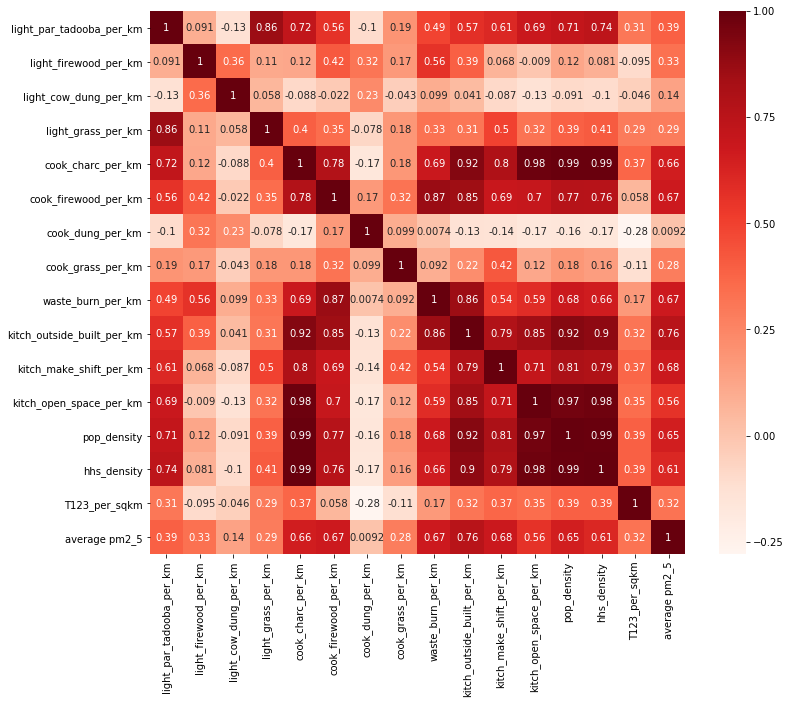

In [84]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = total_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

##### using all features

In [85]:
X = gp_data[['light_par_tadooba_per_km', 'light_firewood_per_km', 'light_cow_dung_per_km', 'light_grass_per_km', 
          'cook_charc_per_km', 'cook_firewood_per_km', 'cook_dung_per_km', 'cook_grass_per_km', 'waste_burn_per_km',
          'kitch_outside_built_per_km', 'kitch_make_shift_per_km', 'kitch_open_space_per_km', 'pop_density', 
          'hhs_density', 'T123_per_sqkm']]
y = gp_data['category']
run_gp_model(X, y)
run_logistic_model(X, y)
run_rf_model(X, y)

c:\users\user\anaconda3\envs\geo_env\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\envs\geo_env\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\user\anaconda3\envs\geo_env\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defin

Gaussian Process Model
Accuracy:  0.5555555555555556
Precision:  [0.         0.55555556 0.        ]
Recall:  [0. 1. 0.]
Logistic Regression Model
Accuracy:  0.5555555555555556
Precision:  [0.   0.4  0.75]
Recall:  [0.  1.  0.5]
Random Forest Model
Accuracy:  0.7777777777777778
Precision:  [0.   0.8  0.75]
Recall:  [0.   1.   0.75]


c:\users\user\anaconda3\envs\geo_env\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### using features with correlation above 0.5

In [86]:
#Correlation with output variable
cor_target = abs(cor['average pm2_5'])#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

cook_charc_per_km             0.655186
cook_firewood_per_km          0.674602
waste_burn_per_km             0.673478
kitch_outside_built_per_km    0.756811
kitch_make_shift_per_km       0.680303
kitch_open_space_per_km       0.561482
pop_density                   0.650220
hhs_density                   0.614839
average pm2_5                 1.000000
Name: average pm2_5, dtype: float64

In [87]:
X = gp_data[['cook_charc_per_km', 'cook_firewood_per_km', 'waste_burn_per_km', 'kitch_outside_built_per_km', 
             'kitch_make_shift_per_km', 'kitch_open_space_per_km', 'pop_density', 'hhs_density']]
y=gp_data['category']
run_gp_model(X,y)
run_logistic_model(X, y)
run_rf_model(X, y)

c:\users\user\anaconda3\envs\geo_env\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\envs\geo_env\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Gaussian Process Model
Accuracy:  0.3333333333333333
Precision:  [0.         0.33333333 0.        ]
Recall:  [0. 1. 0.]
Logistic Regression Model
Accuracy:  0.5555555555555556
Precision:  [0.8  0.25]
Recall:  [0.57142857 0.5       ]
Random Forest Model
Accuracy:  0.6666666666666666
Precision:  [1.  0.5]
Recall:  [0.5 1. ]


##### using  features with correlation >= 0.65

In [88]:
#Correlation with output variable
cor_target = abs(cor['average pm2_5'])#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.65]
relevant_features

cook_charc_per_km             0.655186
cook_firewood_per_km          0.674602
waste_burn_per_km             0.673478
kitch_outside_built_per_km    0.756811
kitch_make_shift_per_km       0.680303
pop_density                   0.650220
average pm2_5                 1.000000
Name: average pm2_5, dtype: float64

In [89]:
X = gp_data[['kitch_outside_built_per_km', 'kitch_make_shift_per_km', 'cook_firewood_per_km', 'cook_charc_per_km', 
             'waste_burn_per_km','pop_density']]
y=gp_data['category']
run_gp_model(X,y)
run_logistic_model(X, y)
run_rf_model(X, y)

Gaussian Process Model
Accuracy:  0.5555555555555556
Precision:  [0.         0.55555556 0.        ]
Recall:  [0. 1. 0.]
Logistic Regression Model
Accuracy:  0.7777777777777778
Precision:  [0.83333333 0.66666667]
Recall:  [0.83333333 0.66666667]


c:\users\user\anaconda3\envs\geo_env\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\envs\geo_env\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Random Forest Model
Accuracy:  0.6666666666666666
Precision:  [0.         0.66666667 0.66666667]
Recall:  [0.  1.  0.5]


c:\users\user\anaconda3\envs\geo_env\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
